In [1]:
# Statistical analysis of the snails called abalones.
# Information about the dataset:
# Attributes (columns):
# 1. sex - categorical:
#    M - male
#    F - female
#    I - infant
# 2. length [mm] - continuous
# 3. diameter [mm] - continuous
# 4. height [mm] - continuous
# 5. whole weight [g] - continuous
# 6. shucked weight [g] (weight of meat) - continuous
# 7. viscera weight [g] (gut weight after bleeding) - continuous
# 8. shell weight [g] (after being dried) - continuous
# 9. rings - integer

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the dataset, and preparing it for analysis

In [4]:
data = pd.read_csv("data/data.csv", sep=',')
unit_colnames = ['Sex', 'Length [mm]', 'Diameter [mm]', 'Height [mm]', 'Whole weight [g]', 'Shucked weight [g]',
                 'Viscera weight [g]', 'Shell weight [g]', 'Rings']
no_unit_colnames = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight',
                    'Shell weight', 'Rings']
data.columns = no_unit_colnames

In [5]:
# 1. Table of the distribution of the qualitative variable in the dataset

In [6]:
def qualitative_characteristics():
    v1 = data['Sex'].value_counts().values
    percentages = [round(l / v1.sum() * 100, 3) for l in v1]
    return [v1, percentages]

table1 = pd.DataFrame(qualitative_characteristics(), columns=["Male", "Infant", "Female"], index=["count", "%"])
display(table1.T)

,count,%
Male,1527.0,36.566
Infant,1342.0,32.136
Female,1307.0,31.298


In [7]:
# 2. Table with summary statistics for the quantitative variables in the dataset

In [8]:
def quantitative_characteristics():
    result = []
    for l in range(1, len(data.columns)):
        result.append(data.iloc[:, l].describe().drop('count').T)
    return result

table2 = pd.DataFrame(quantitative_characteristics(), columns=["mean", "std", "min", "25%", "50%", "75%", "max"])
display(table2)

,mean,std,min,25%,50%,75%,max
Length,0.524009,0.120103,0.0750,0.450000,0.54500,0.61500,0.8150
Diameter,0.407892,0.099250,0.0550,0.350000,0.42500,0.48000,0.6500
Height,0.139527,0.041826,0.0000,0.115000,0.14000,0.16500,1.1300
Whole weight,0.828818,0.490424,0.0020,0.441500,0.79975,1.15325,2.8255
Shucked weight,0.359400,0.221980,0.0010,0.186000,0.33600,0.50200,1.4880
Viscera weight,0.180613,0.109620,0.0005,0.093375,0.17100,0.25300,0.7600
Shell weight,0.238852,0.139213,0.0015,0.130000,0.23400,0.32900,1.0050
Rings,9.932471,3.223601,1.0000,8.000000,9.00000,11.00000,29.0000


In [9]:
# 3. Counts of occurrences of each category for the qualitative variable in the dataset.

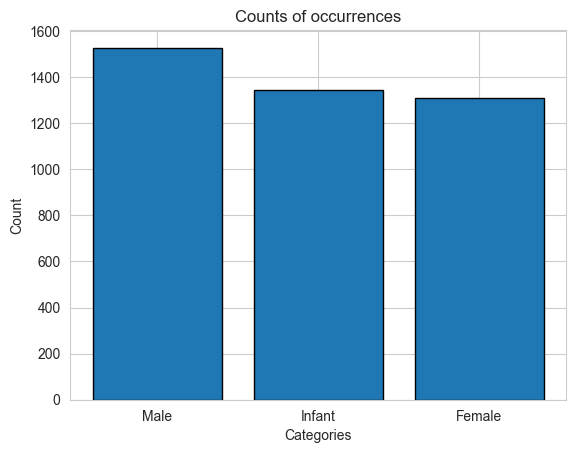

In [10]:
qualitative = qualitative_characteristics()
categories = ['Male', 'Infant', 'Female']
plt.bar(categories, qualitative[0], edgecolor='black')
plt.ylabel('Count')
plt.xlabel('Categories')
plt.title('Counts of occurrences')
plt.show()

In [11]:
# 4. histogram of each quantitative variable in the dataset. All histograms should be placed in a single figure
    # spanning 4 rows and 2 columns.

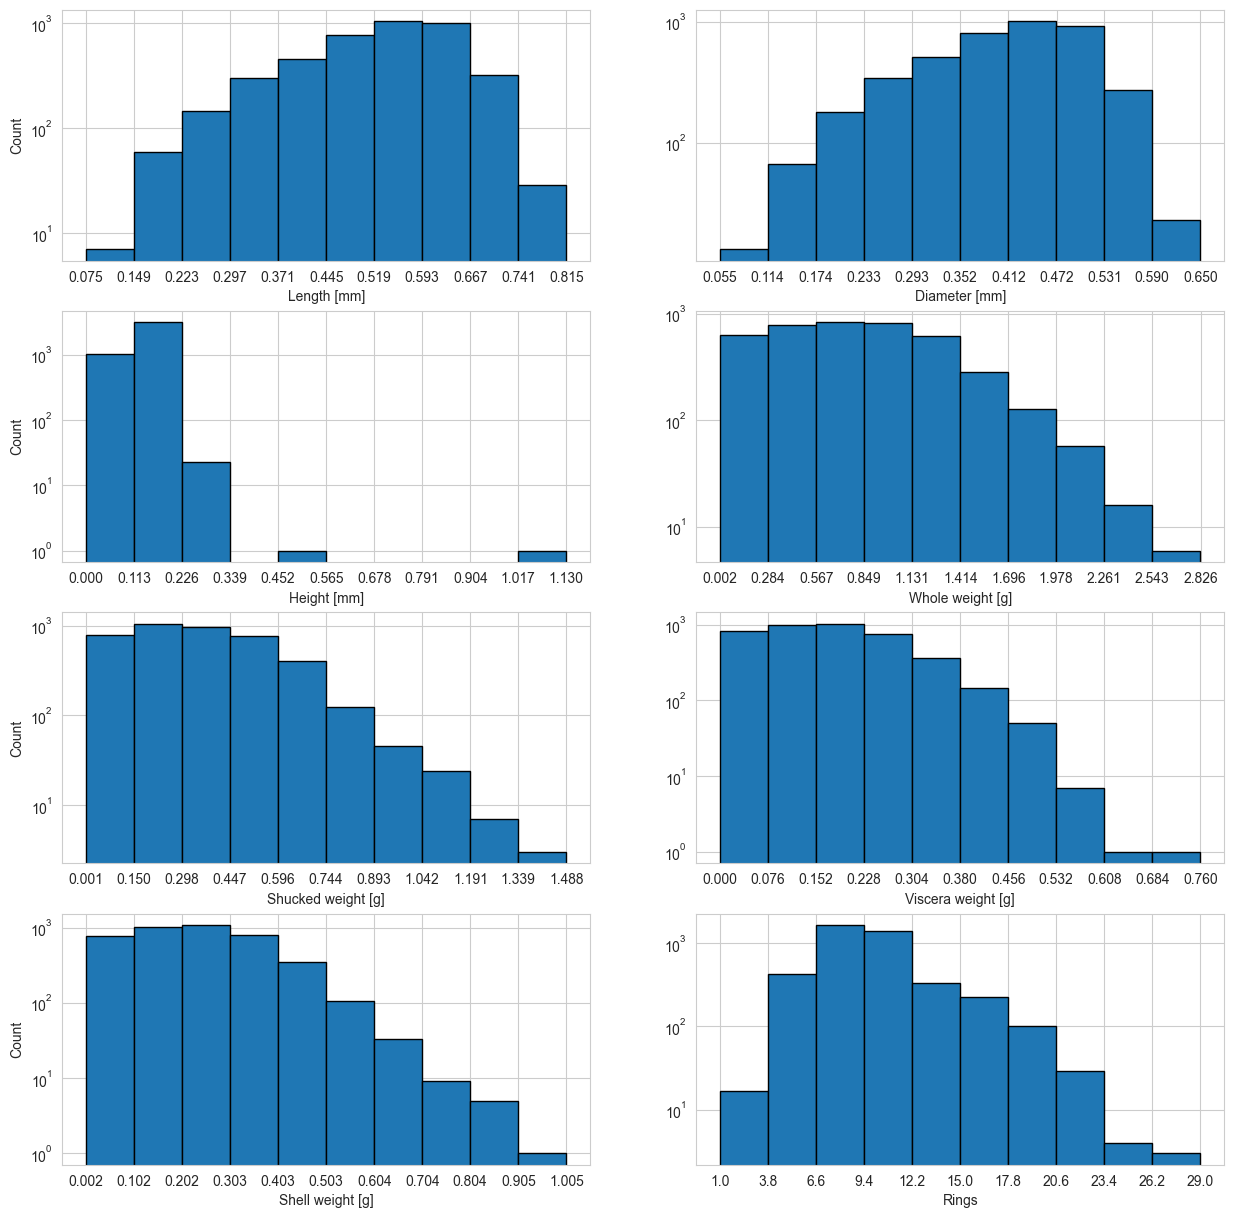

In [12]:
def adjust_for_histrogram(column_data, bins):
    mininum = column_data.min()
    maximum = column_data.max()
    bin_size = (maximum - mininum) / bins
    return [mininum, maximum, bin_size]

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
j = 0
for i in range(1, len(data.columns)):
    axs[j, (i - 1) % 2].hist(data.iloc[:, i], bins=10, edgecolor='black', log=True)
    axs[j, (i - 1) % 2].set_xlabel(unit_colnames[i])
    arr = adjust_for_histrogram(data.iloc[:, i], 10)
    axs[j, (i - 1) % 2].set_xticks([round(arr[0] + arr[2] * i, 3) for i in range(11)])
    if i % 2 != 0:
        axs[j, (i - 1) % 2].set_ylabel('Count')
    j += (i - 1) % 2
plt.show()

In [13]:
# 5. Scatter plot for each pair of the quantitative variables in the dataset. All scatter plots should be placed 
    # in a single figure spanning 14 rows and 2 columns.

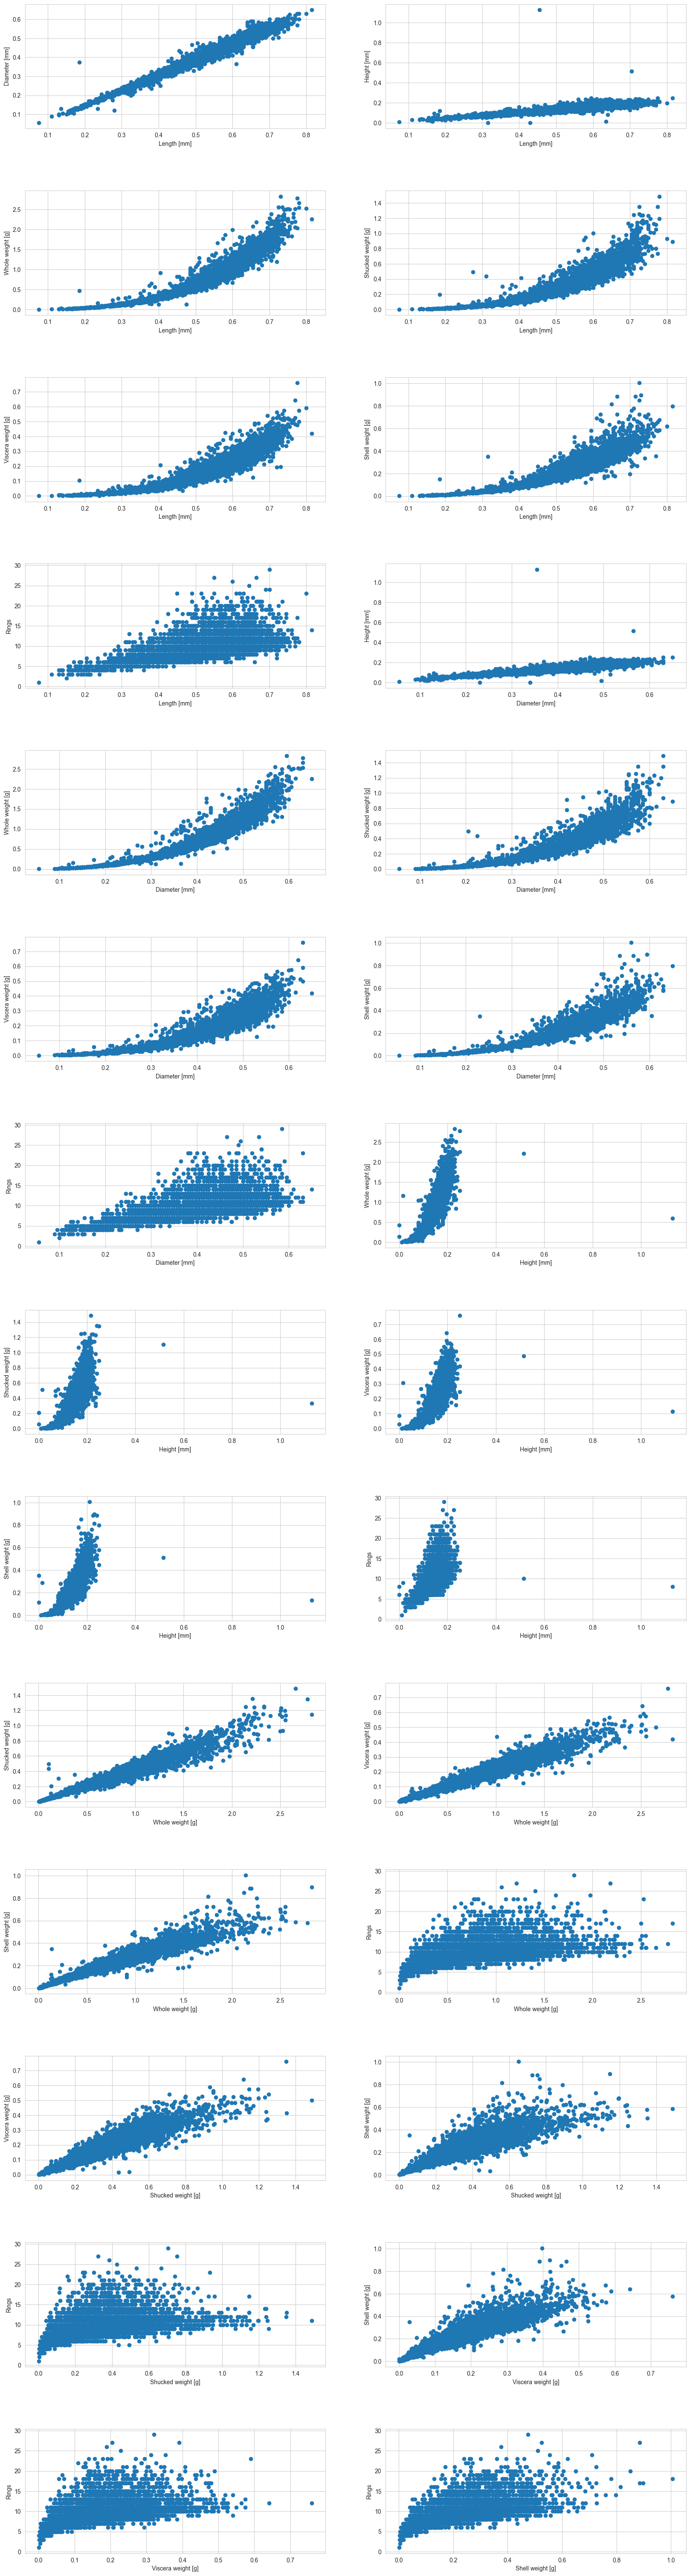

In [14]:
fig, axs = plt.subplots(14, 2, figsize=(20, 65))
plt.subplots_adjust(top=0.97, bottom=0.05, hspace=0.5, wspace=0.2)
k, x = 0, 0
for i in range(1, len(data.columns)):
    for j in range(i + 1, len(data.columns)):
        axs[x, k % 2].scatter(data.iloc[:, i], data.iloc[:, j])
        axs[x, k % 2].set_xlabel(unit_colnames[i])
        axs[x, k % 2].set_ylabel(unit_colnames[j])
        k += 1
        if k % 2 == 0:
            x += 1
plt.show()

In [15]:
# 6. Table representing a linear correlation matrix of all quantitative variables in the dataset.

In [16]:
display(data.iloc[:, 1:].corr())

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [17]:
# 7. Heatmap representing a linear correlation matrix of all quantitative variables in the dataset.

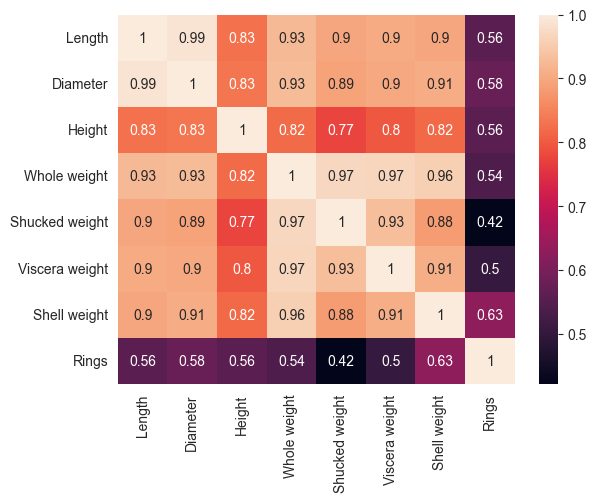

In [18]:
sns.heatmap(data.iloc[:, 1:].corr(), annot=True)
plt.show()

In [19]:
# 8. Linear regression plot with the two quantitative variables that are most strongly linearly correlated.

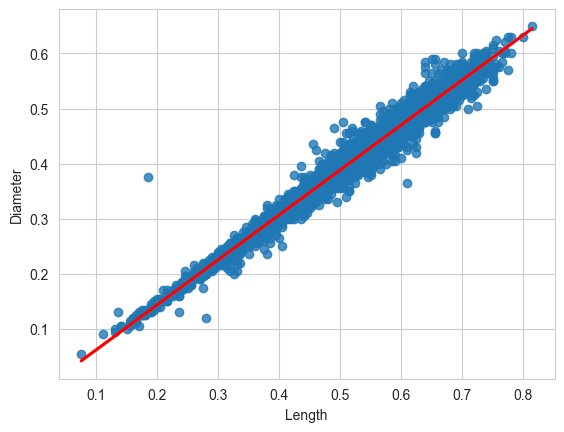

In [20]:
sns.regplot(x=data['Length'], y=data['Diameter'], line_kws={"color": "red"})
plt.show()

In [21]:
# Table with summary statistics for the quantitative variables in the dataset split by the categories of the qualitative variable

In [22]:
tmp = ['F', 'I', 'M']
col1 = ['Female', 'Infant', 'Male']
final = []
for i, column in enumerate(data.columns[1:]):
    col0 = [no_unit_colnames[i + 1], '', '']
    for o, el in enumerate(tmp):
        stats = data[data['Sex'] == el][column].describe().drop('count').values
        stats = [round(l, 3) for l in stats]
        stats.insert(0, col1[o])
        stats.insert(0, col0[o])
        final.append(stats)

table3 = pd.DataFrame(final, columns=["Feature", "Sex", "mean", "std", "min", "25%", "50%", "75%", "max"])
display(table3)

,Feature,Sex,mean,std,min,25%,50%,75%,max
0,Length,Female,0.579,0.086,0.275,0.525,0.590,0.640,0.815
1,,Infant,0.428,0.109,0.075,0.360,0.435,0.510,0.725
2,,Male,0.561,0.103,0.155,0.505,0.580,0.630,0.780
3,Diameter,Female,0.455,0.071,0.195,0.410,0.465,0.505,0.650
4,,Infant,0.326,0.088,0.055,0.270,0.335,0.390,0.550
5,,Male,0.439,0.084,0.110,0.395,0.455,0.500,0.630
6,Height,Female,0.158,0.040,0.015,0.140,0.160,0.175,1.130
7,,Infant,0.108,0.032,0.000,0.085,0.110,0.130,0.220
8,,Male,0.151,0.035,0.025,0.130,0.155,0.175,0.515
9,Whole weight,Female,1.047,0.430,0.080,0.730,1.038,1.320,2.657


In [23]:
# 10. Box plot for each quantitative variable in the dataset split by the categories of the qualitative variable.

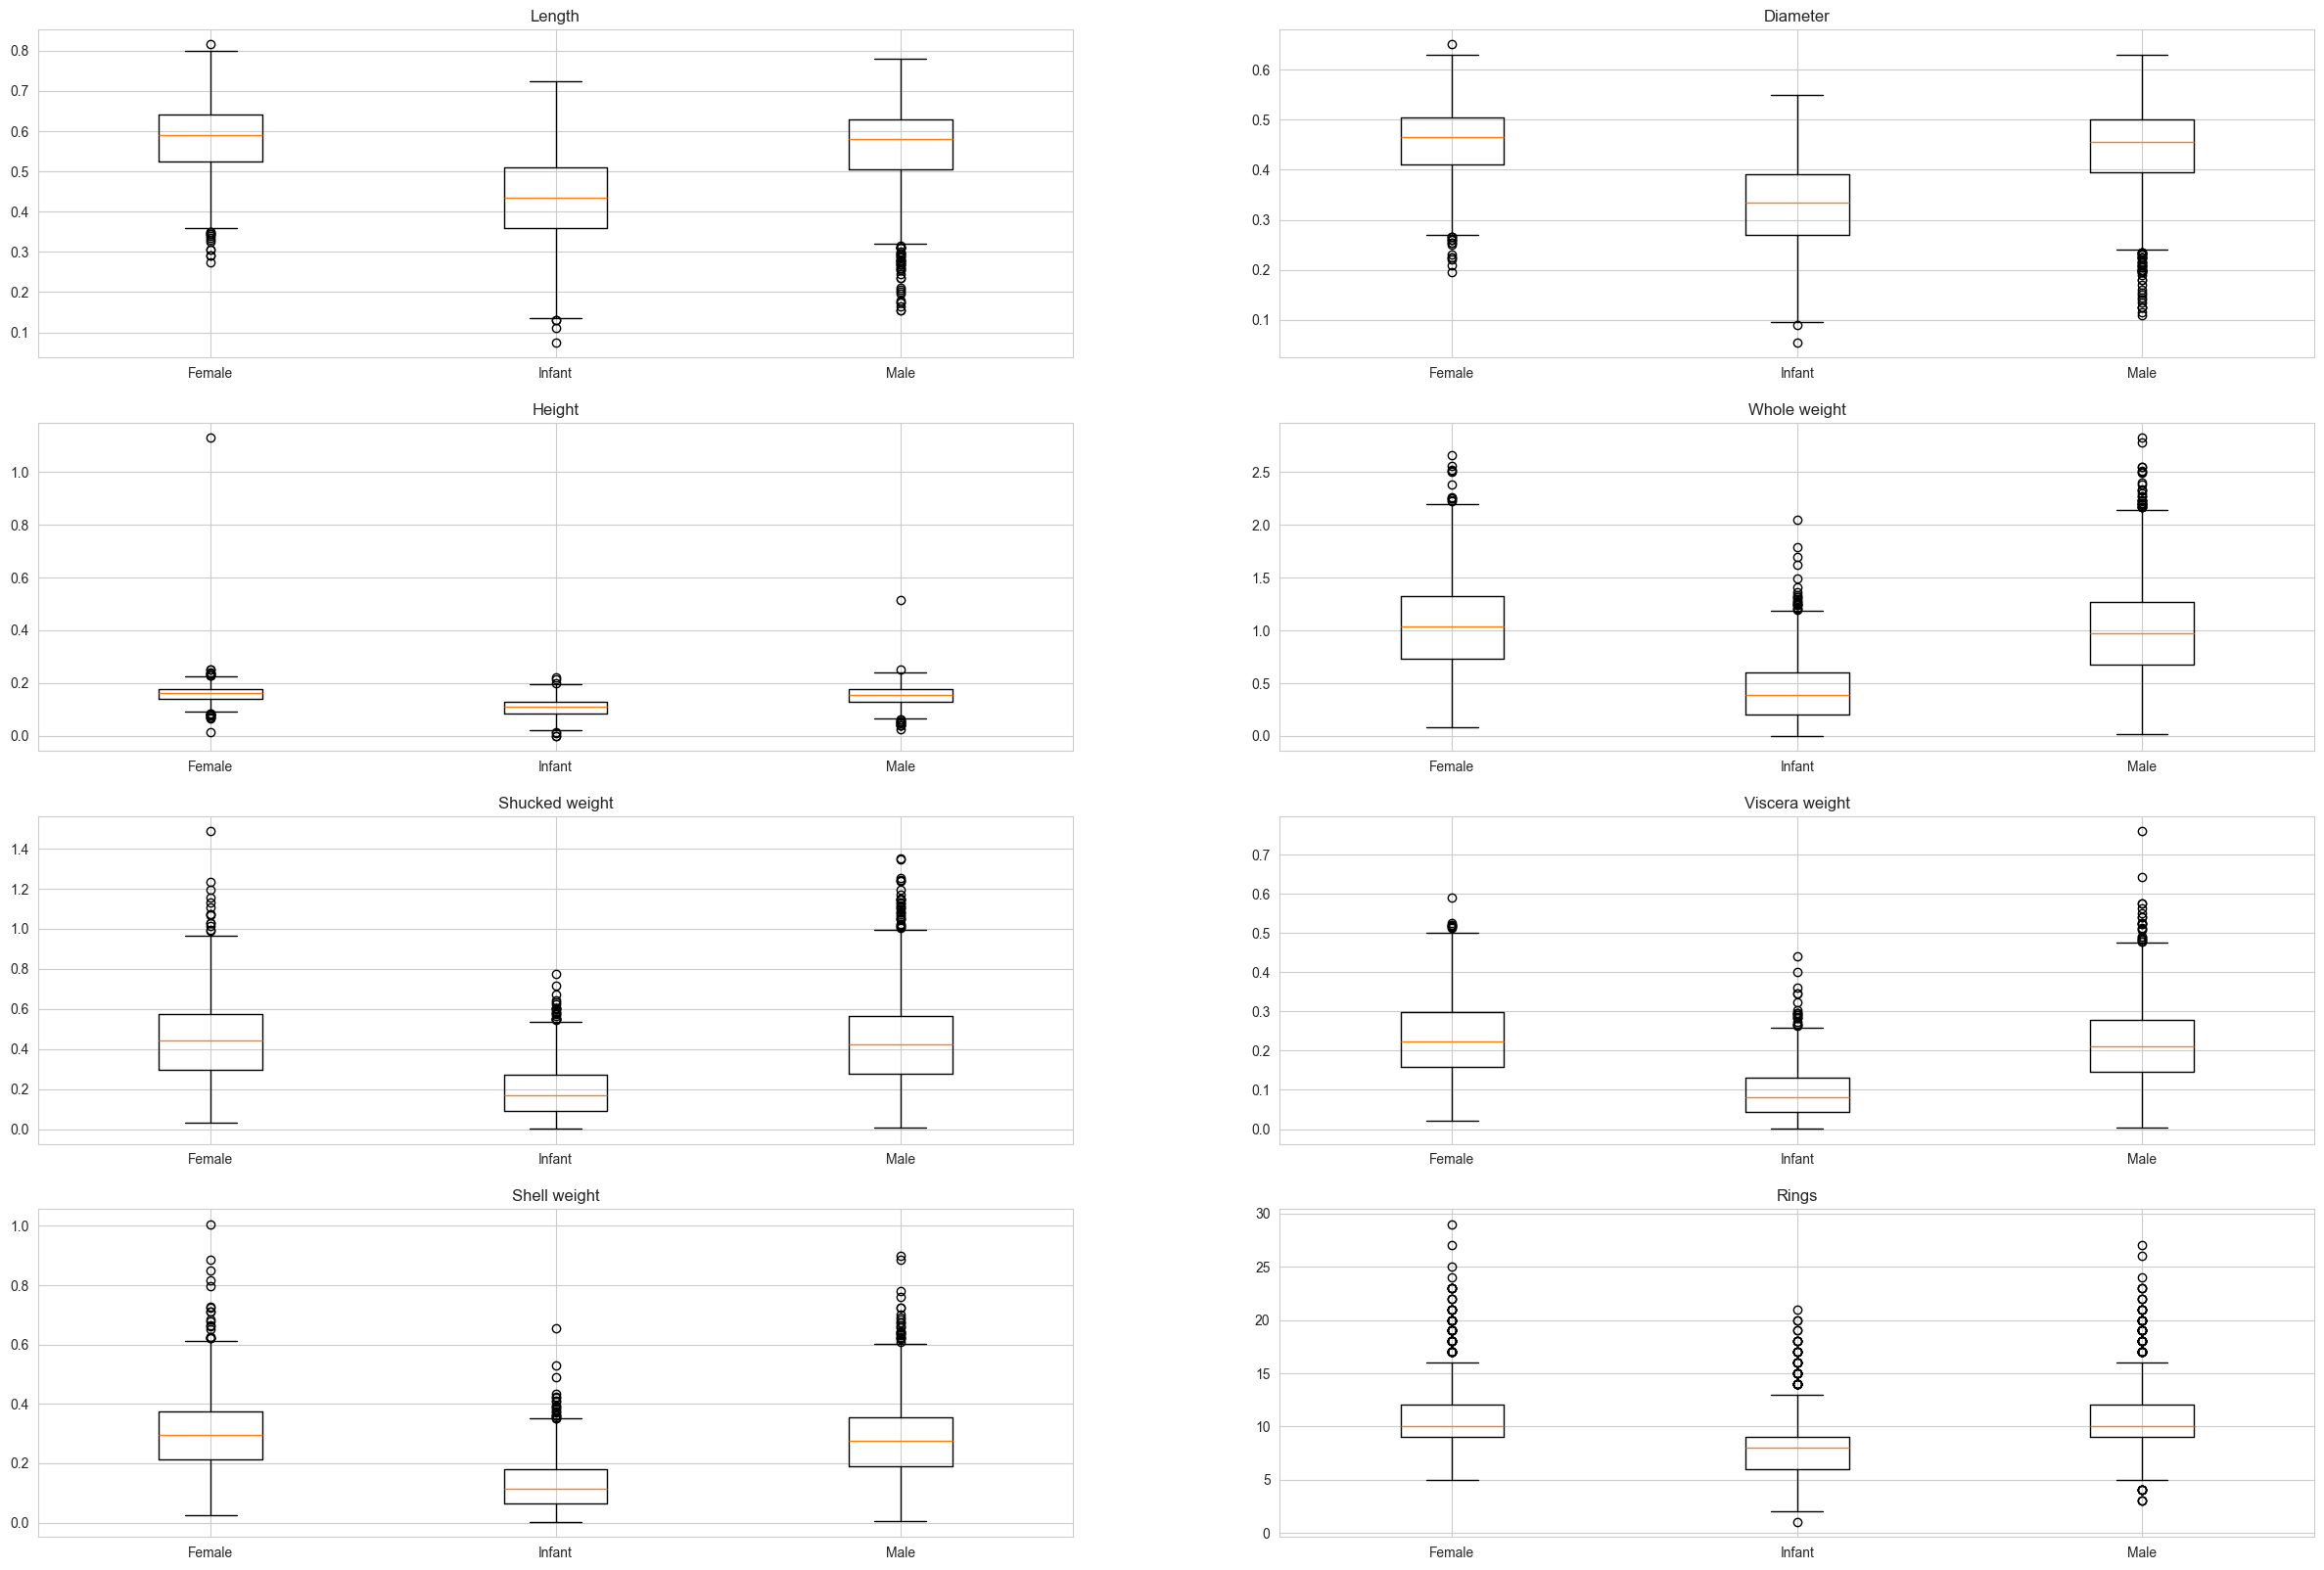

In [24]:
def group_data(colname, sex):
    result = []
    for element in sex:
        result.append(data[data['Sex'] == element][colname])
    return result

titles = ['Female', 'Infant', 'Male']
fig, axs = plt.subplots(4, 2, figsize=(30, 20))
for i, col in enumerate(data.columns[1:]):
    axs[int(i / 2), i % 2].boxplot(group_data(col, ['F', 'I', 'M']), labels=titles)
    axs[int(i / 2), i % 2].set_title(col)
plt.show()